In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# How many records are in the data 

In [7]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


# Computing duration

In [19]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda dt: dt.total_seconds() / 60)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [20]:
df['duration'].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

# Data preparation


In [21]:
numerical = ['duration']

y = df[numerical]

c:\Users\Lenovo\Documents\Promotal\myEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

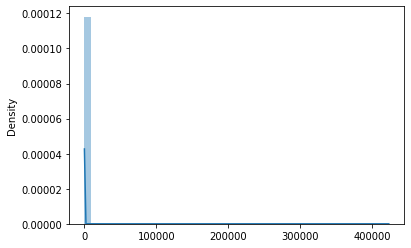

In [22]:

sns.distplot(y)

In [24]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

c:\Users\Lenovo\Documents\Promotal\myEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

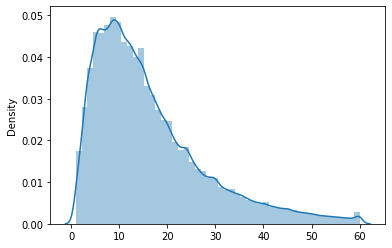

In [25]:
y = df[numerical]
sns.distplot(y)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


old_obcer = 1154112
new_obcer = 1109826 

In [27]:
1154112 -  1109826 

44286

So we droped 44286

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [31]:
df['PUlocationID'] = df['PUlocationID'].fillna(-1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14516\1263210530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUlocationID'] = df['PUlocationID'].fillna(-1)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [36]:
1109826 / 182818

6.070660438250063